                   category  QA_count
0        object recognition       231
1     attribute recognition       240
2     spatial understanding       220
3  object state recognition       252
4      functional reasoning       217
5           world knowledge       213
6       object localization       263


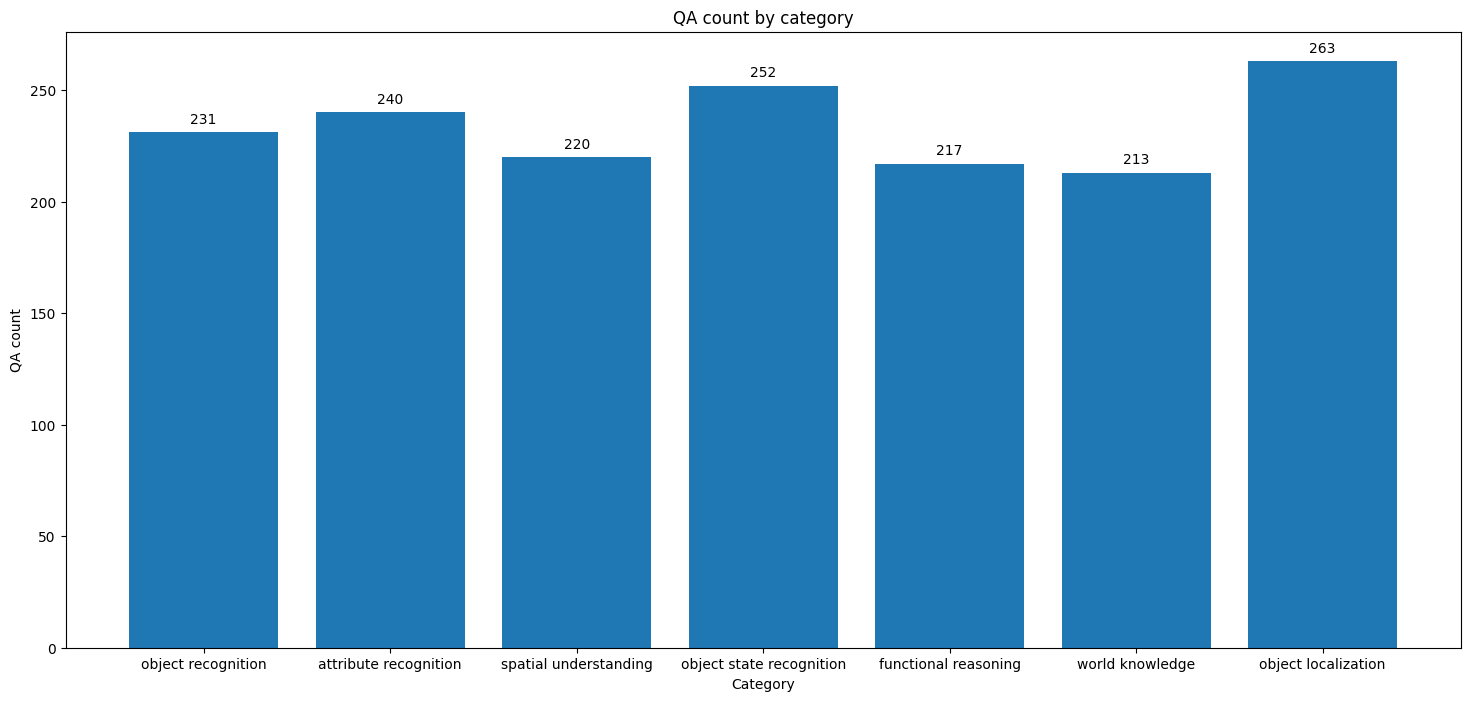

In [2]:
import json
import numpy as np
import pandas as pd

with open('open-eqa/data/open-eqa-v0.json') as f:
    data = json.load(f)

# category에 따라 분류
category = {}
for item in data:
    if item['category'] not in category:
        category[item['category']] = []
    category[item['category']].append(item)

# 위의 출력을 table 형태로 시각화해서 출력, total 포함
category_table = {}
for key, value in category.items():
    category_table[key] = len(value)

# category_table['total'] = len(data)

# category_table을 pandas DataFrame으로 변환
category_table = pd.DataFrame(category_table.items(), columns=['category', 'QA_count'])
print(category_table)


# 막대그래프로 표현
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 8))
plt.bar(category_table['category'], category_table['QA_count'])
plt.xlabel('Category')
plt.ylabel('QA count')
plt.title('QA count by category')

# 각 바 위에 숫자 표시
for i, v in enumerate(category_table['QA_count']):
    plt.text(i, v + 4, str(v), ha='center')

plt.show()

In [377]:
# extra answer 여부
has = 0
no = 0
for item in data:
    if (item.get('extra_answers', 'None') != 'None'):
        has += 1
    else:
        no += 1
        
has_extra_answer = {}
has_extra_answer['yes'] = has
has_extra_answer['no'] = no

hea_table = pd.DataFrame(has_extra_answer.items(), columns=['has extra answer?', 'count'])
print(hea_table)


  has extra answer?  count
0               yes    263
1                no   1373


                   category  QA_count
0        object recognition         0
1     attribute recognition         0
2     spatial understanding         0
3  object state recognition         0
4      functional reasoning         0
5           world knowledge         0
6       object localization       263


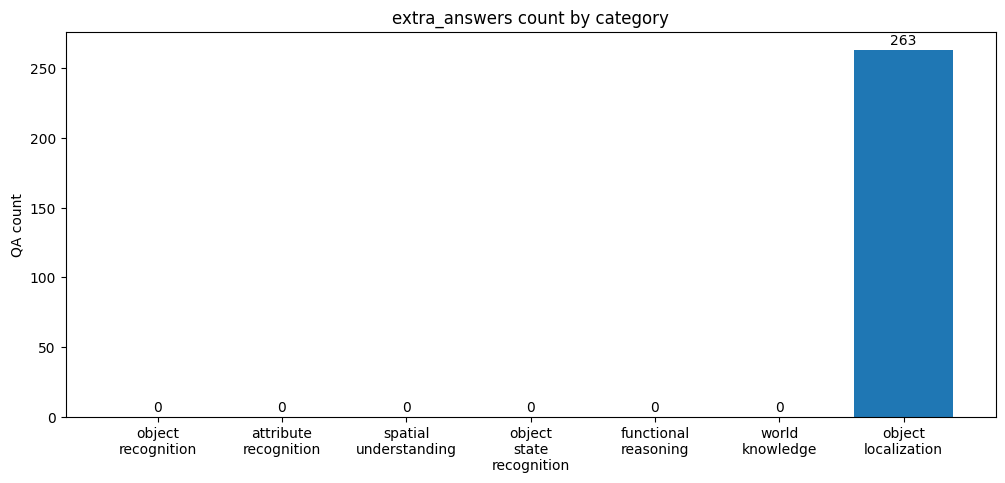

In [378]:
## category에 따른 extra_answers 개수
extra_answers = {}
for key in category:
    extra_answers[key] = 0
    for item in data:
        if(item['category'] == key):
            if (item.get('extra_answers', 'None') != 'None'):
                extra_answers[key] += 1

extra_answers['total'] = len(data)

category_extra_answers = {key: extra_answers[key] for key in category}
df = pd.DataFrame(category_extra_answers.items(), columns=['category', 'QA_count'])
print(df)

# 막대그래프로 표현
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.bar(df['category'], df['QA_count'])
plt.xticks(df['category'], [label.replace(' ', '\n') for label in df['category']])
plt.ylabel('QA count')
plt.title('extra_answers count by category')

# 각 바 위에 숫자 표시
for i, v in enumerate(df['QA_count']):
    plt.text(i, v + 4, str(v), ha='center')

plt.show()

                          hm3d-v0  scannet-v0
object recognition             75         156
attribute recognition          77         163
spatial understanding          69         151
object state recognition       90         162
functional reasoning           71         146
world knowledge                72         141
object localization           103         160


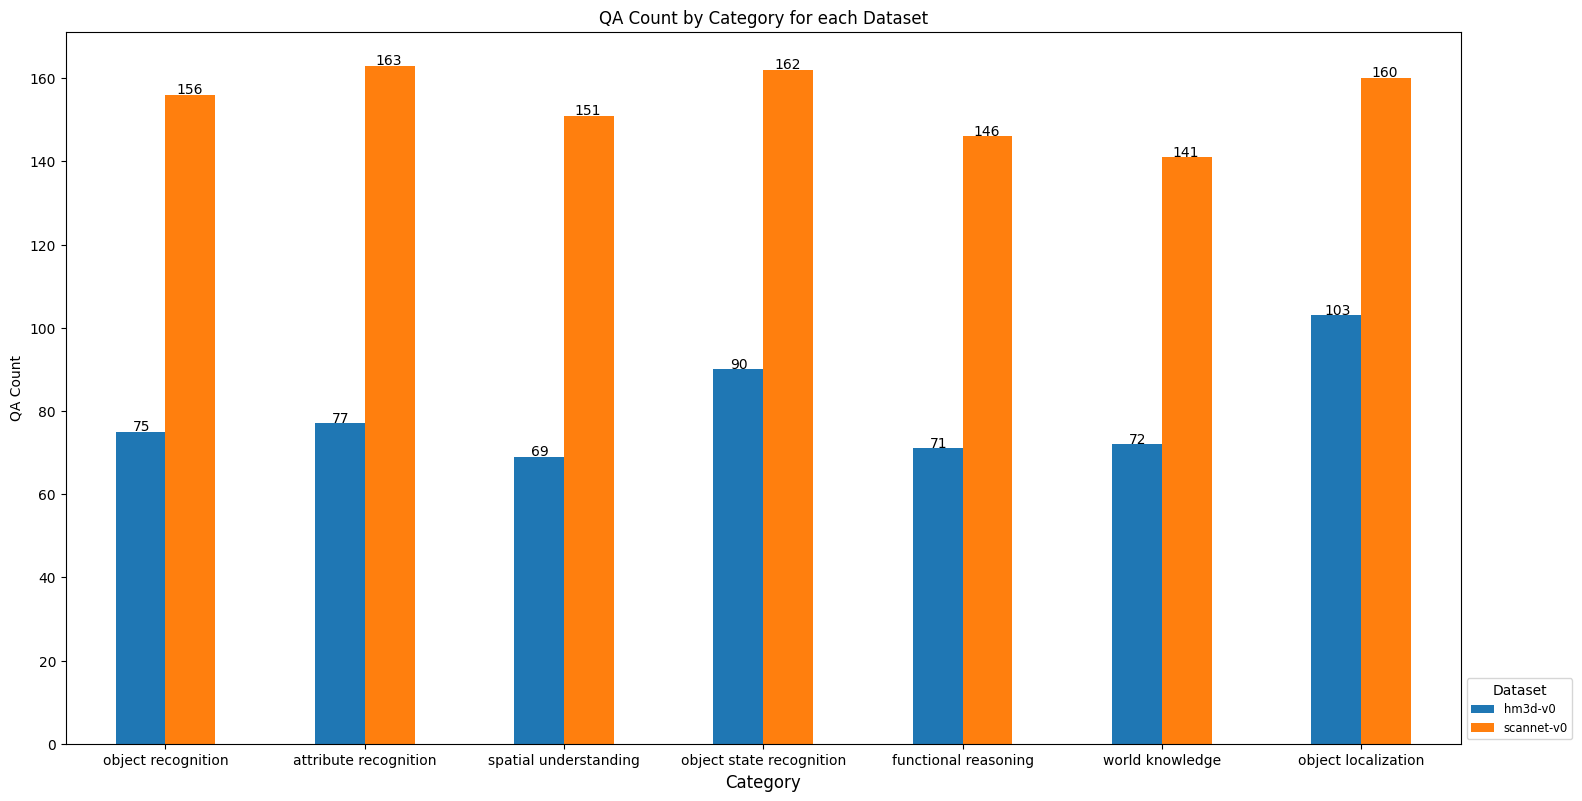

In [381]:
# episode_history의 dataset에 따라 구분
## episode_history 는 / 앞에 dataset 이름이 붙어있음

episode_dataset = {}
for item in data:
    dataset_name = item['episode_history'].split('/')[0]
    if dataset_name not in episode_dataset:
        episode_dataset[dataset_name] = []
    episode_dataset[dataset_name].append(item)

hm3d_v0_count = episode_dataset['hm3d-v0']
scannet_v0_count = episode_dataset['scannet-v0']

# dict 에 저장
episode_dict = {}

for epi_key in episode_dataset:
    for c_key in category:
        count = 0
        for item in episode_dataset[epi_key]:
            if item['category'] == c_key:
                count += 1
        if epi_key not in episode_dict:
            episode_dict[epi_key] = {}
        # episode_dict[epi_key][c_key] = round(count / len(episode_dataset[epi_key]) * 100, 1)
        episode_dict[epi_key][c_key] = count

episode_df = pd.DataFrame(episode_dict)
print(episode_df)

# 막대그래프로 같은 category에 대해 각 dataset의 category별 qa 개수를 비교한다.
# x축은 question의 category가 주어지며, 각 dataset에 대해 두개의 막대그래프를 그린다.
# y축은 category 별 qa의 개수이다.

episode_df.plot(kind='bar', figsize=(18, 8))

plt.ylabel('QA Count')
plt.xlabel('Category', fontsize='large')
plt.title('QA Count by Category for each Dataset')
plt.xticks(ha='center', rotation=0)
plt.legend(title='Dataset', loc='upper left', bbox_to_anchor=(1, 0.1), fontsize='small')

# 막대 위에 숫자 표시하기
for i, j in enumerate(episode_df['hm3d-v0']):
    plt.text(i-0.12, j+0.3, str(j), ha='center')
    
for i, j in enumerate(episode_df['scannet-v0']):
    plt.text(i+0.12, j+0.3, str(j), ha='center')

plt.subplots_adjust(top=1.0)
plt.show()

      dataset  QA_count
0     hm3d-v0       557
1  scannet-v0      1079


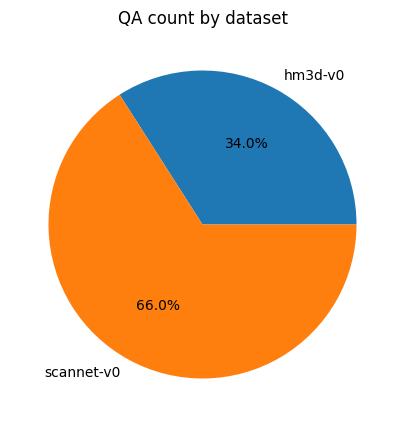

In [339]:
episode_dataset_count = {key: len(episode_dataset[key]) for key in episode_dataset}
df = pd.DataFrame(episode_dataset_count.items(), columns=['dataset', 'QA_count'])
print(df)
 
# 원그래프로 나타낼때 정확한 개수와 퍼센트를 함께 다음과 같이 표시한다.
# 35.0% (349)
plt.figure(figsize=(5, 5))
plt.pie(df['QA_count'], labels=df['dataset'], autopct='%1.1f%%')
plt.title('QA count by dataset')
plt.show()

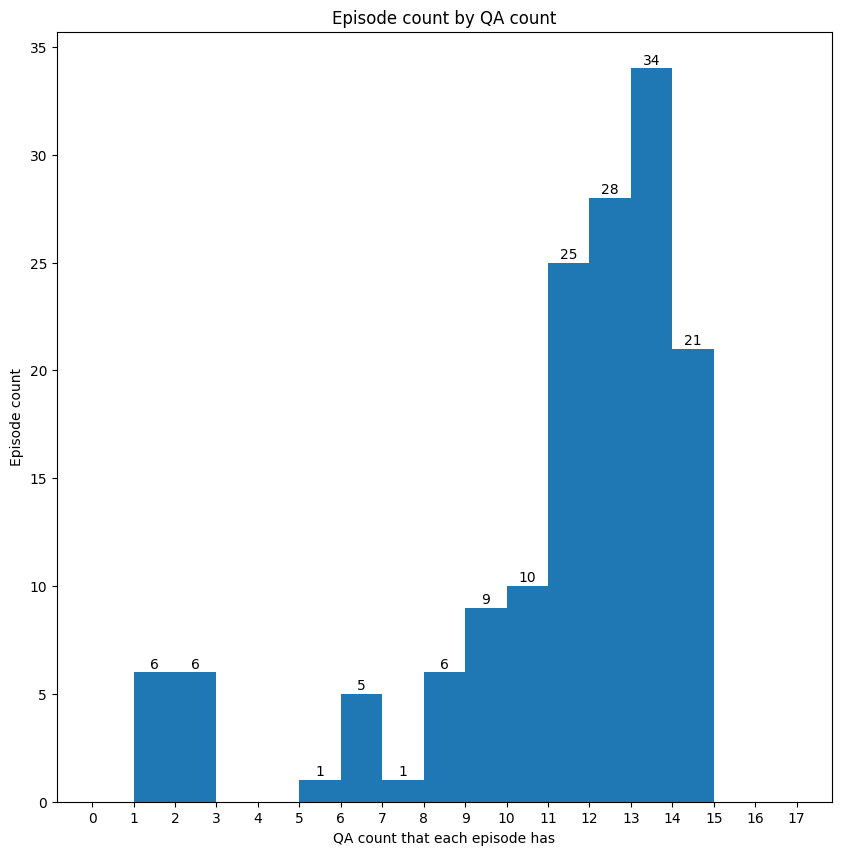

In [349]:
history = {}
# 같은 episode history 를 가지는 data끼리 dictionary 형태로 묶어서 각 key별 value의 개수 반환
for item in data:
    if item['episode_history'] == 'None':
        continue
    if item['episode_history'] not in history:
        history[item['episode_history']] = []
    history[item['episode_history']].append(item)

hist_arr = [len(history[key]) for key in history]

# 히스토그램 작성
fig, ax = plt.subplots(figsize=(10,10))
counts, bins, patches = ax.hist(hist_arr, bins=range(0,18,1))

# 각 바 위에 숫자 표시
for count, patch in zip(counts, patches):
    height = patch.get_height()
    if (int(height) != 0):
        ax.annotate(f'{int(height)}',
                    xy=(patch.get_x() + patch.get_width() / 2, height),
                    xytext=(0, 1),  # 5 points vertical offset
                    textcoords='offset points',
                    ha='center', va='bottom')
ax.set_xticks(bins)

plt.xlabel('QA count that each episode has')
plt.ylabel('Episode count')
plt.title('Episode count by QA count')
plt.show()

In [341]:
# answer 종류 : Yes/Yes./yes 빈도와 No/No./no 빈도
yes = 0
no = 0
etc = 0
for item in data:
    if item['answer'] in ['Yes', 'Yes.', 'yes']:
        yes += 1
    elif item['answer'] in ['No', 'No.', 'no']:
        no += 1
    else:
        etc += 1

answer_table = {}
answer_table['yes'] = yes
answer_table['no'] = no
answer_table['etc'] = etc
answer_table['total'] = yes+no+etc
df = pd.DataFrame(answer_table.items(), columns=['answer', 'count'])
print(df)

  answer  count
0    yes    120
1     no    144
2    etc   1372
3  total   1636


  question type  count
0      location    210
1         color    127
2   preposition    242
3     existence     79
4         count     14


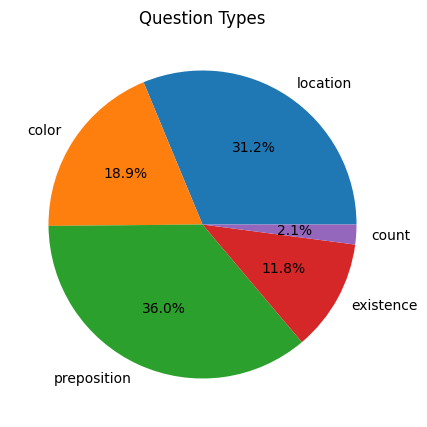

In [364]:
# question type (EQA의 구분에 따라... 이거 근데 수동으로 해야 할 것 같은데.)
## location, color, color_room, preposition, existence, logical, count, room_count, distance
### question 가 포함하는 의문사를 보고 결정, 대소문자 무시
location = 0
color = 0
preposition = 0
existence = 0
count = 0
room_count = 0
etc = 0
for item in data:
    question = item['question'].lower()
    if 'where is' in question or 'where are' in question:
        location += 1
    elif 'what color' in question:
        color += 1
    elif ('what is' in question or 'what are' in question) and 'on' in question or 'above' in question or 'next to' in question or 'below' in question:
        preposition += 1
    elif 'is there' in question or 'are there' in question:
        existence += 1
    elif 'how many' in question:
        count += 1
    else:
        etc += 1

question_table = {}
question_table['location'] = location
question_table['color'] = color
question_table['preposition'] = preposition
question_table['existence'] = existence
question_table['count'] = count
# question_table['etc'] = etc

qTable = pd.DataFrame(question_table.items(), columns=['question type', 'count'])
print(qTable)

# 원그래프로 표현
plt.figure(figsize=(5, 5))
plt.pie(question_table.values(), labels=question_table.keys(), autopct='%1.1f%%')
plt.title('Question Types')

# 그래프 보여주기
plt.show()


In [10]:
## 제시 + 질문 (비교 등)
## 이중 질문 ( 있니? 있다면 무엇이니? )
double_question = 0
con_question = 0
count_person = 0

for item in data:
    # I 또는 you 가 있는 question인지 확인
    if 'I ' in item['question'] or 'you' in item['question']:
        count_person += 1
    if (item['question'].count('if') + item['question'].count('If') > 0):
        print(item['question'])
        double_question += 1
    elif (item['question'].count(',') > 0):
        con_question += 1

special_question = {}
special_question['\'I/you\' expression'] = { 'count' : count_person, 'percent' :round(count_person/1636*100, 1)}
special_question['multiple question mark'] = { 'count' : double_question, 'percent' : round(double_question/1636*100, 1)}
special_question['multiple comma'] = { 'count' : con_question, 'percent' : round(con_question/1636*100, 1)}

sq_df = pd.DataFrame(special_question.items(), columns=['feature', 'count'])
print(sq_df)




Where can I set if I want to warmup?
Where can I sit and eat if I don't want to use the dining table?
Where can I store books if the shelf gets full?
If the lights suddenly go out, where should I go to fix it?
If I sit in the armchair in the living room, what animal can I touch with my right hand?
what is between the fruit bowl and knife set?
where can I keep a new knife I got?
How can I reach the wine glasses if I'm too short?
If I sit at the dining room table, will the back two legs of my chair be touch wood or carpet?
Where should I look if I want to research a topic?
If you were to go down the stairs, then straight into the tv room, turn left in the door and go straight until you enter the last room, which room would it be?
If you go to the restroom there are ornaments and frames about one sport, which sport is it?
Is there a place where I can leave my pet? If so where is it?
Is there a room to work? If so which room is it?
What should I do if I see fire in the hallway?
What can I 